In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../dataset./classified_logs.csv")
df.head()

,raw_log,log_type
0,03-17 16:13:38.811 1702 2395 D WindowManager...,Android
1,03-17 16:13:38.819 1702 8671 D PowerManagerS...,Android
2,03-17 16:13:38.820 1702 8671 D PowerManagerS...,Android
3,03-17 16:13:38.839 1702 2113 V WindowManager...,Android
4,03-17 16:13:38.859 2227 2227 D TextView: vis...,Android


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31999 entries, 0 to 31998
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   raw_log   31999 non-null  object
 1   log_type  31999 non-null  object
dtypes: object(2)
memory usage: 500.1+ KB


In [9]:
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["log_type"])

log_type_names = label_encoder.classes_
df[["log_type", "label"]].drop_duplicates().sort_values("label")

,log_type,label
0,Android,0
2000,Apache,1
4000,BGL,2
8000,HDFS,3
12000,HPC,4
6000,Hadoop,5
10000,HealthApp,6
14000,Linux,7
15999,Mac,8
17999,OpenSSH,9


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    df["raw_log"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")

Train samples: 25599, Test samples: 6400


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [12]:
clf = LogisticRegression(max_iter=1000, solver='saga', n_jobs=-1)
clf.fit(X_train_vec, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,1000
,multi_class,'deprecated'


In [20]:
y_pred = clf.predict(X_test_vec)

print(classification_report(y_test, y_pred, target_names=log_type_names))

print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

     Android       1.00      1.00      1.00       400
      Apache       1.00      1.00      1.00       400
         BGL       1.00      1.00      1.00       400
        HDFS       1.00      1.00      1.00       400
         HPC       1.00      1.00      1.00       400
      Hadoop       1.00      1.00      1.00       400
   HealthApp       1.00      1.00      1.00       400
       Linux       1.00      1.00      1.00       400
         Mac       1.00      1.00      1.00       400
     OpenSSH       1.00      1.00      1.00       400
   OpenStack       1.00      1.00      1.00       400
   Proxifier       1.00      1.00      1.00       400
       Spark       1.00      1.00      1.00       400
 Thunderbird       1.00      1.00      1.00       400
     Windows       1.00      1.00      1.00       400
   Zookeeper       1.00      1.00      1.00       400

    accuracy                           1.00      6400
   macro avg       1.00   

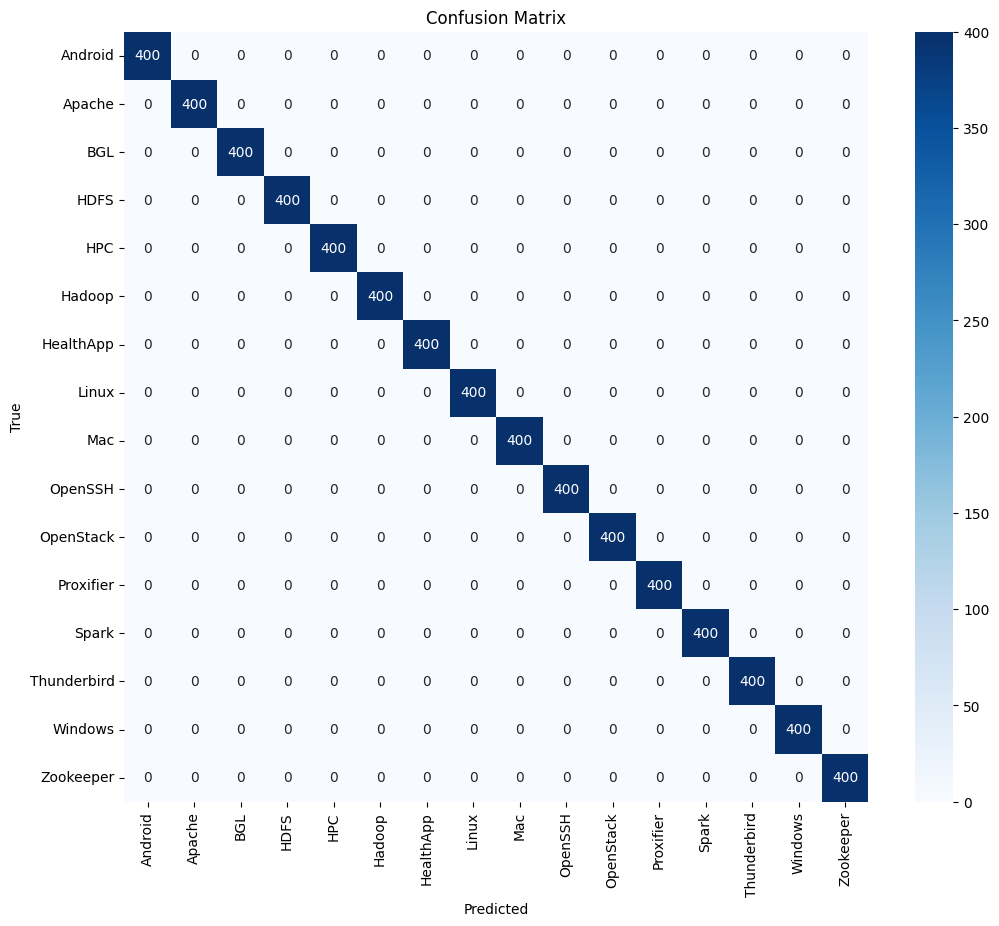

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=log_type_names, yticklabels=log_type_names, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()